# Plotting Basics

Purpose: convey information clearly

Large amounts, made easy to digest

Aesthetically pleasing charts help as well

Semantic differences:
 - **graph**: shows a mathematical function (a line, usually continuous)
 - **plot**: observations marked on a coordinate system (points, usually continuous x/y axes)
 - **chart**: graphic representation of data (e.g.: bars, axes usually discrete)
 - **diagram**: an illustrative figure

## Table of contents
- Matplotlib — basic plots
 - line plots
 - bar plots
 - scatter plots
 - subplots
 - visual options
    
- Seaborn — statistical plots
 - distribution plots
 - heatmaps and violinplots, swarmplots
 - kde, 2d kde
 - pair grids
    
- Other packages
 - joyplots
 - interacive plots
 - network charts
 - map charts
 - pandas dataframe integration

TODO: links

---

- **Matplotlib**: inspired by Matlab, most widely used, simple but powerful
 - line
 - scatter
 - bar
 - options

TODO:
 - look at matplotlib official tutorial/other tutorials
 - Table of contents and links

In [1]:
import warnings

In [2]:
warnings.simplefilter('ignore', FutureWarning)

things you might have not known about: joyplot, pandas styling

In [3]:
import matplotlib.pyplot as plt

In [4]:
# show the images as output of cells
%matplotlib inline

In [5]:
import matplotlib; matplotlib.rcParams['figure.dpi'] = 100  # entirely optional, just to make the plots larger

---

TODO: colon (;) breaks the line, meaning it returns none, so it isn't displayed

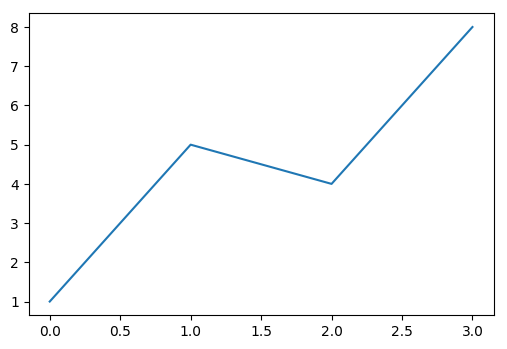

In [15]:
plt.plot([1, 5, 4, 8]);

In [11]:
x = 1, 2, 4
y = 5, 4, 7

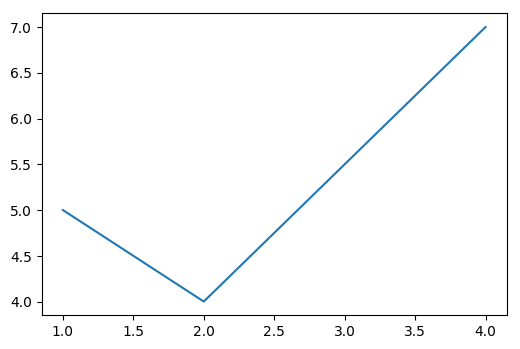

In [13]:
plt.plot(x, y);

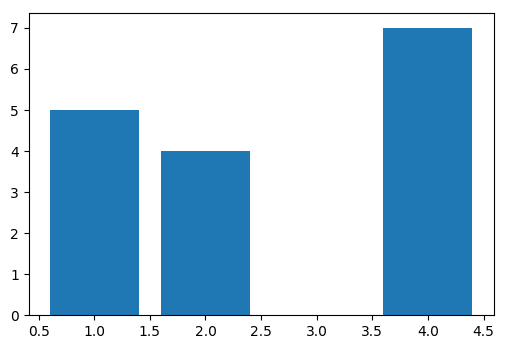

In [17]:
plt.bar(x, y);

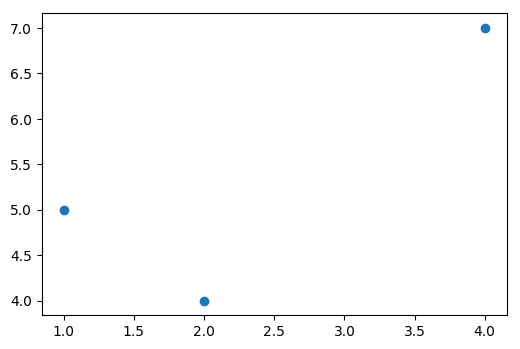

In [19]:
plt.scatter(x, y);

---

more points

In [21]:
import numpy as np

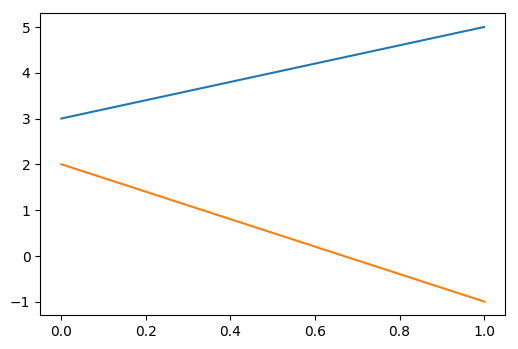

In [38]:
x = np.linspace(0, 1, num=100)
y1 =  2 * x + 3
y2 = -3 * x + 2

plt.plot(x, y1);
plt.plot(x, y2);

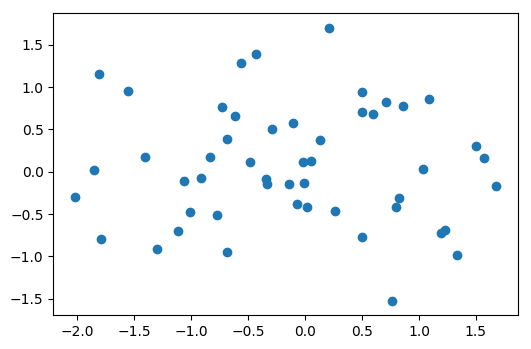

In [40]:
x = np.random.randn(50)
y = np.random.randn(50)
plt.scatter(x, y);

---

In [27]:
x = np.linspace(-np.pi, np.pi, num=50)

In [28]:
x

array([-3.14159265, -3.01336438, -2.88513611, -2.75690784, -2.62867957,
       -2.5004513 , -2.37222302, -2.24399475, -2.11576648, -1.98753821,
       -1.85930994, -1.73108167, -1.60285339, -1.47462512, -1.34639685,
       -1.21816858, -1.08994031, -0.96171204, -0.83348377, -0.70525549,
       -0.57702722, -0.44879895, -0.32057068, -0.19234241, -0.06411414,
        0.06411414,  0.19234241,  0.32057068,  0.44879895,  0.57702722,
        0.70525549,  0.83348377,  0.96171204,  1.08994031,  1.21816858,
        1.34639685,  1.47462512,  1.60285339,  1.73108167,  1.85930994,
        1.98753821,  2.11576648,  2.24399475,  2.37222302,  2.5004513 ,
        2.62867957,  2.75690784,  2.88513611,  3.01336438,  3.14159265])

In [29]:
y = np.sin(x)  # notice the broadcast, x is an array

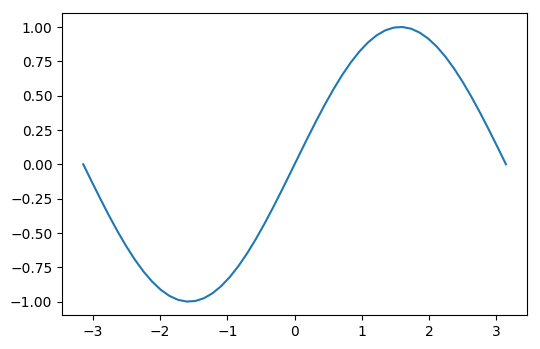

In [30]:
plt.plot(x, y)

dealing with noise:

In [31]:
y = np.random.rand(50)

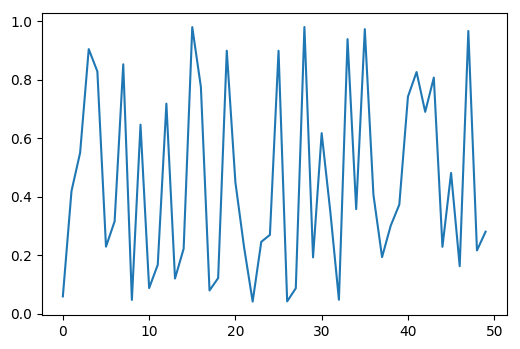

In [32]:
plt.plot(y)

In [33]:
from scipy.signal import savgol_filter  # like running average, but doesn't cutoff any elements

In [34]:
y = savgol_filter(y, window_length=5, polyorder=1)

/Users/stefan/.virtualenvs/viz-workshop/lib/python3.7/site-packages/scipy/signal/_savitzky_golay.py:135: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  coeffs, _, _, _ = lstsq(A, y)


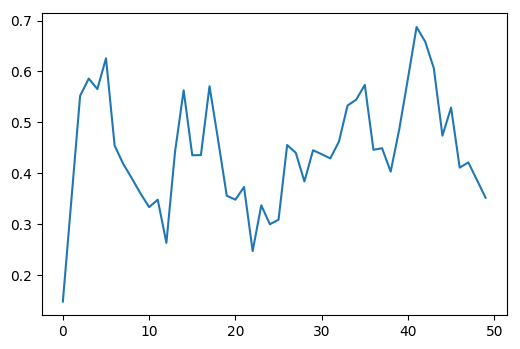

In [35]:
plt.plot(y)

---

TODO: options

TODO: subplots

---

## Seaborn

In [41]:
import seaborn as sns

In [42]:
sns.set()

- Relationship
 - scatter
 - line
- Categorical
 - between categories
 - within a category

- **Seaborn**: advanced charts, built on top of matplotlib
 - distplots
 - heatmaps
 - jointplots
 - others: boxplots, violinplots

TODO: 
 - talk about seaborn' default style
 - example of sns despine
 - example of changing [color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

### Relationship plots

In [43]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


An example dataset of tips in a restaurant

#### Scatter

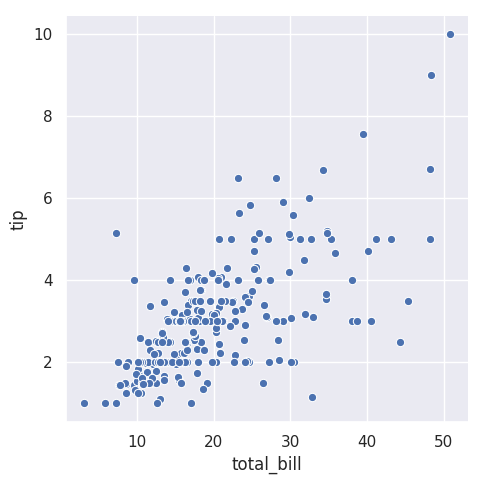

In [44]:
sns.relplot(data=tips, x='total_bill', y='tip');

Visualize the relationship between two variables using a scatterplot

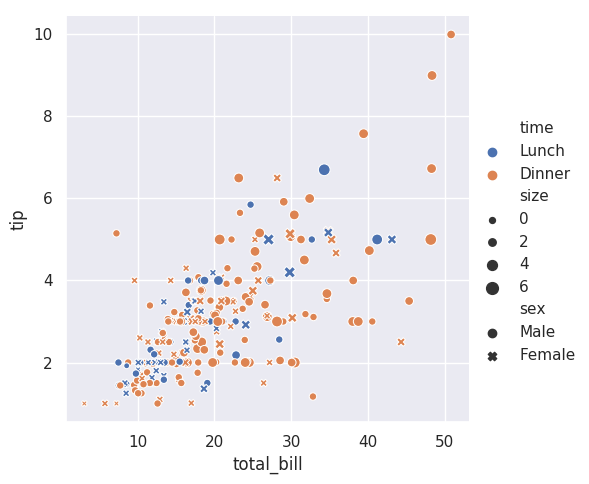

In [45]:
sns.relplot(
    data=tips,
    x='total_bill', 
    y='tip', 
    hue='time',
    style='sex',
    size='size',
);

Add additional information such as the time of the meal (color), the customer's gender (shape) and the party size (size of marker)

#### Line

In [46]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


Another example dataset, of continuous measurements (over time)

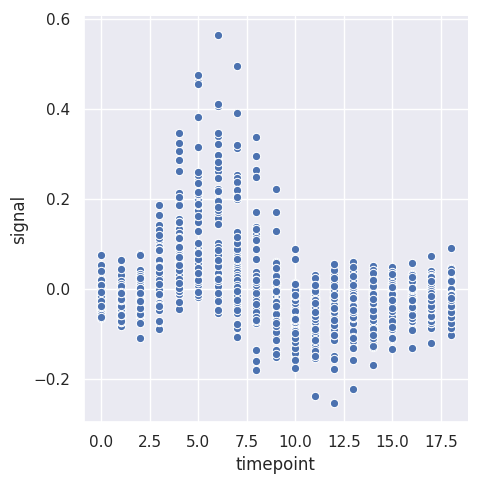

In [47]:
sns.relplot(data=fmri, x='timepoint', y='signal');

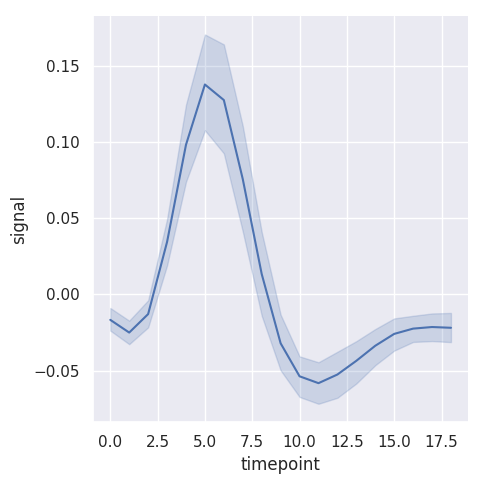

In [48]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line');

Aggregating it into a line, with mean and confidence interval (95%) is more informative

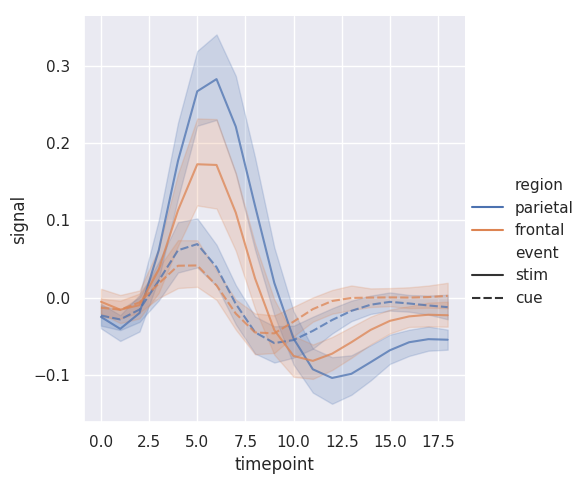

In [49]:
sns.relplot(
    kind='line',
    data=fmri,
    x='timepoint',
    y='signal',
    hue='region',
    style='event',
    alpha=.75,
);

Show additional information: the region (color) and event (line style).

As you can see, it can get cluttered very quickly.

### Categorical plots

We'll exemplify on the same, `tips` dataset

#### Between categories

The x axis is categorical, so points are grouped together and are jittered a little as to not overlap, but still show the amount of points in each category/total bill segment. This is called a swarmplot.

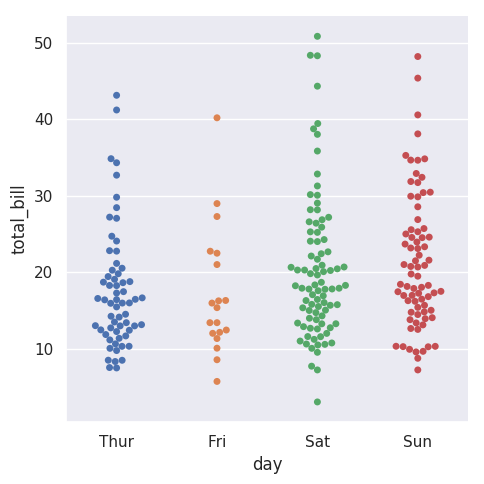

In [50]:
sns.catplot(x='day', y='total_bill', kind='swarm', data=tips);

Again, additional information can be shown:

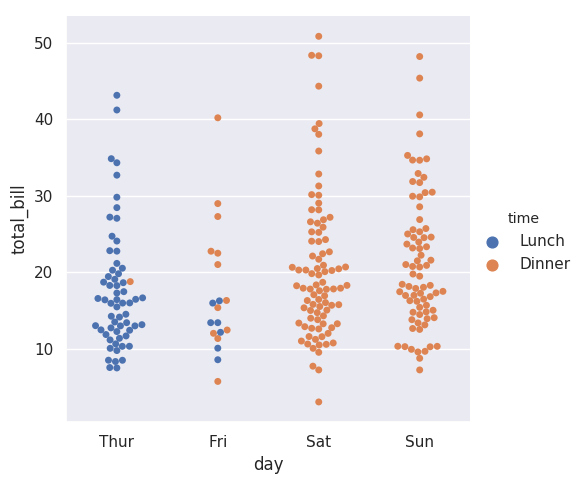

In [51]:
sns.catplot(
    kind='swarm',
    data=tips,
    x='day',
    y='total_bill',
    hue='time',
);

#### Distribution

Boxplot: the box shows the three quartiles, and whiskers extend to show the smallest and largest values, excepting outliers which are plotted separatedly

The three quartiles are:
 1. lower quartile (25% of elements are less than it)
 2. median (50% of elements are less than it)
 3. upper quartile (75% elements are less than it)
 
A point is considered an outlier if it is farther than 1.5 IQR from the lower and upper quartiles.
IQR, the inter-quartile range, is simply the distance between the lower and upper quartiles.

In [52]:
tips.groupby('day').total_bill.describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


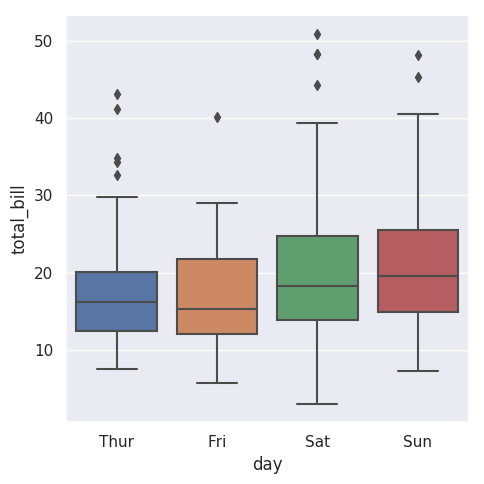

In [53]:
sns.catplot(kind='box', data=tips, x='day', y='total_bill');

Similar to the boxplot, but shows more information about the distribution. Instead of the quartiles and ranges, it shows a KDE. Think of it as a continuous histogram. Its shape allows it to show data for two types of observations for each x-axis categorical value.

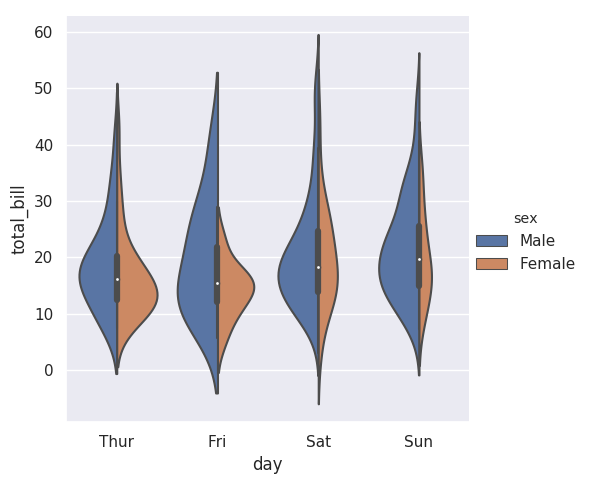

In [54]:
sns.catplot(
    kind='violin',
    split=True,
    
    data=tips,
    x='day',
    y='total_bill',
    hue='sex',
    scale='count',
);

The width of each KDE shows the amount of observations falling in that segment

### Distributions

In [55]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Univariate

A **histogram** (the columns) shows how many observations fall in each _bin_.

A **KDE**, Kernel Density Estimation, fits a probability density function over the distribution. You can think of it as a continuous approximation of the histogram.

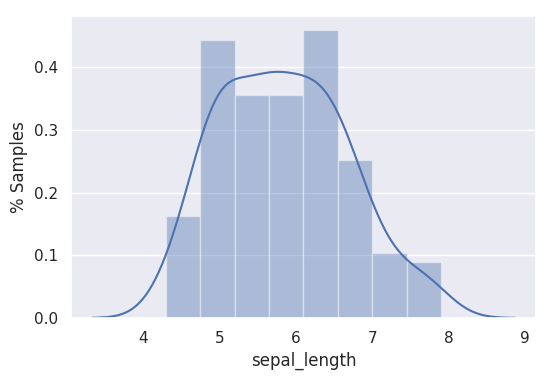

In [56]:
sns.distplot(iris.sepal_length)
plt.gca().xaxis.grid(False)
plt.ylabel('% Samples');

It seems like our distribution is made up of multiple composing distributions. Since the data comes from natural phenomena, we expect it to be somewhat normally shaped. 

Plotting the KDE for each species reveals the underlying distributions:

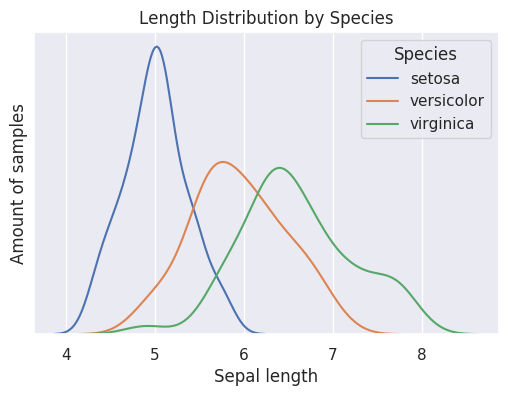

In [57]:
for species, sub_df in iris.groupby('species'):
    sns.kdeplot(sub_df.sepal_length, label=species)

plt.legend(title='Species')
plt.xlabel('Sepal length')
plt.ylabel('Amount of samples')
plt.yticks([])
plt.title('Length Distribution by Species');

#### Bivariate

Scatterplot in the center with univariate histograms on the sides:

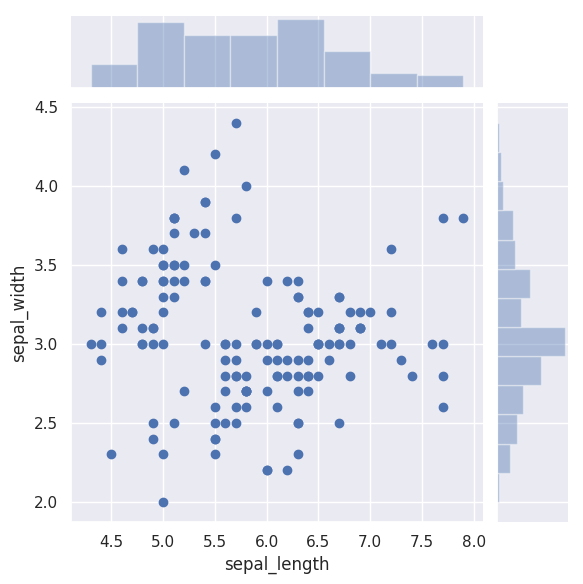

In [58]:
sns.jointplot(data=iris, x='sepal_length', y='sepal_width');

Bivariate (2D) analogous of KDE:

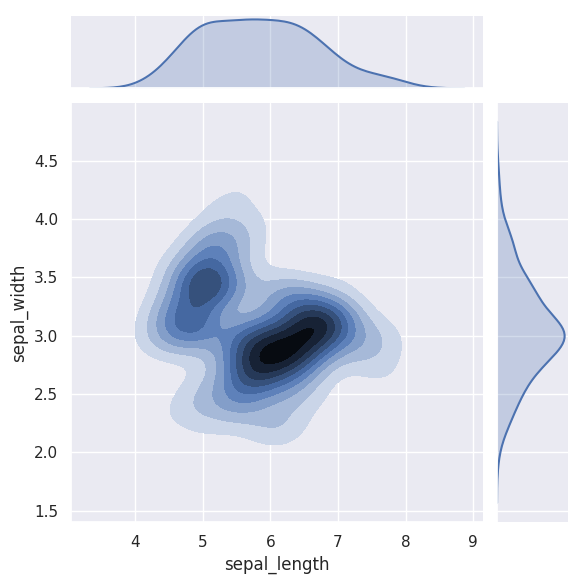

In [59]:
sns.jointplot(kind='kde', data=iris, x='sepal_length', y='sepal_width', shade_lowest=False);

Similarly, we can decompose the distributions:

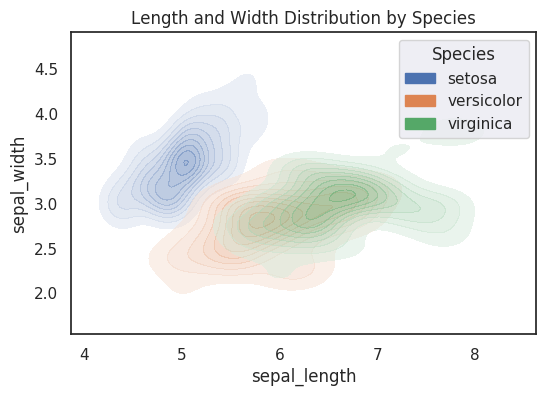

In [60]:
with sns.axes_style('white'):
    for species, sub_df in iris.groupby('species'):
        sns.kdeplot(sub_df.sepal_length, sub_df.sepal_width,  label=species, 
                    shade=True, shade_lowest=False, alpha=.5)

plt.legend(title='Species')
plt.title('Length and Width Distribution by Species');

More than two variables: just have multiple pairwise plots

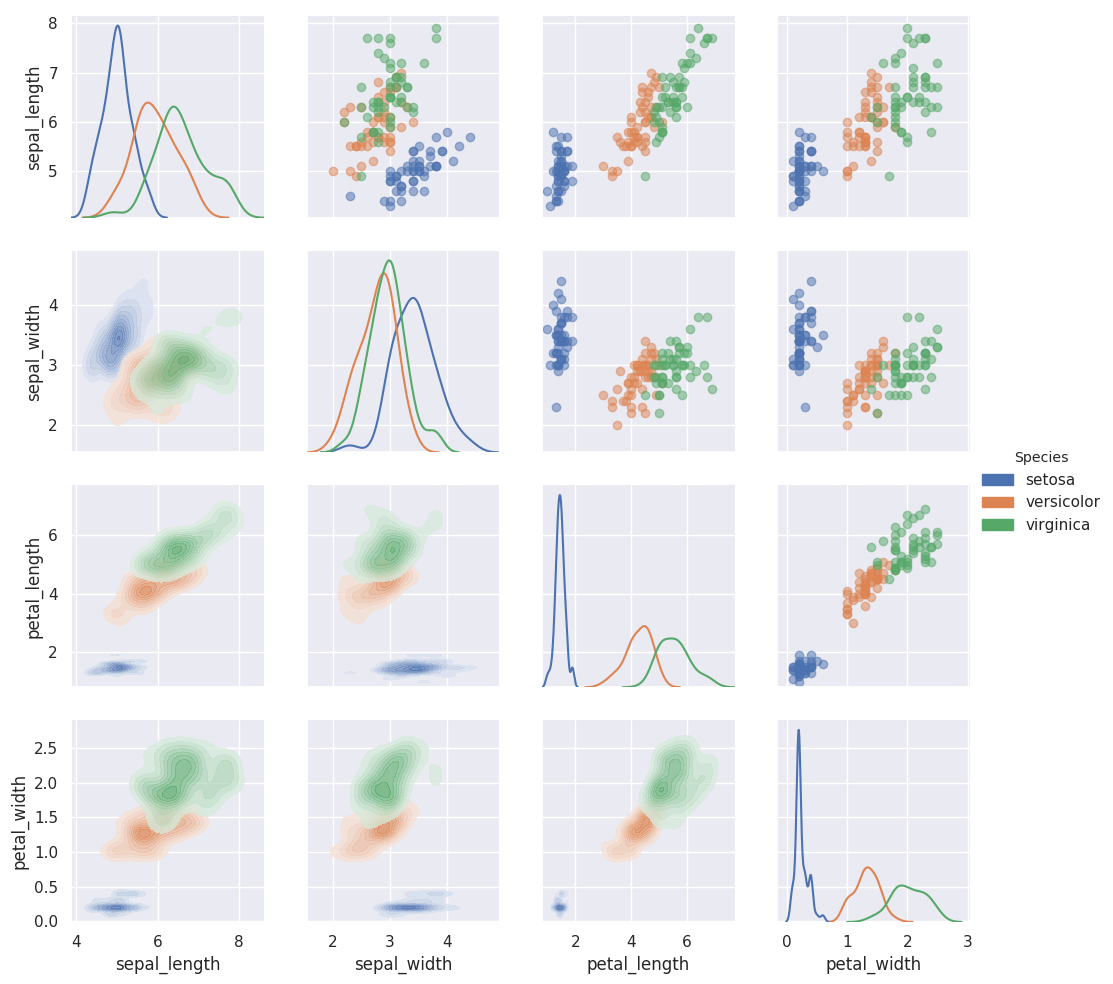

In [61]:
g = sns.PairGrid(iris, diag_sharey=False, hue='species')

g.map_diag(sns.kdeplot)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.kdeplot, alpha=.75, shade=True, shade_lowest=False)

g.add_legend(title='Species');

---

#### Linear relationships

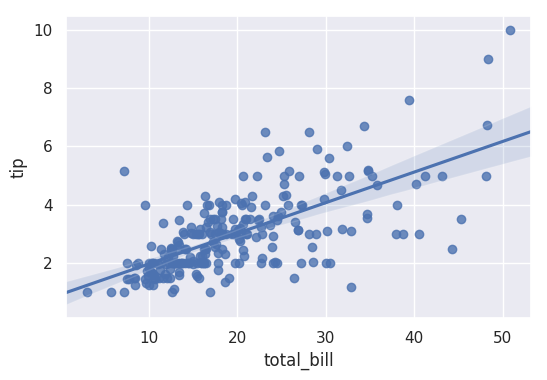

In [62]:
sns.regplot(data=tips, x='total_bill', y='tip');

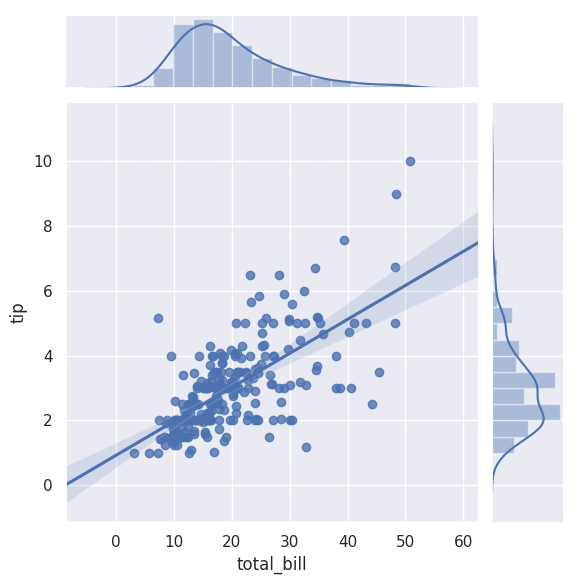

In [63]:
sns.jointplot(kind='reg', data=tips, x='total_bill', y='tip');

---

In [64]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [65]:
flights = flights.pivot('month', 'year', 'passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


The z-axis (color intensity) represents the number of passengers:

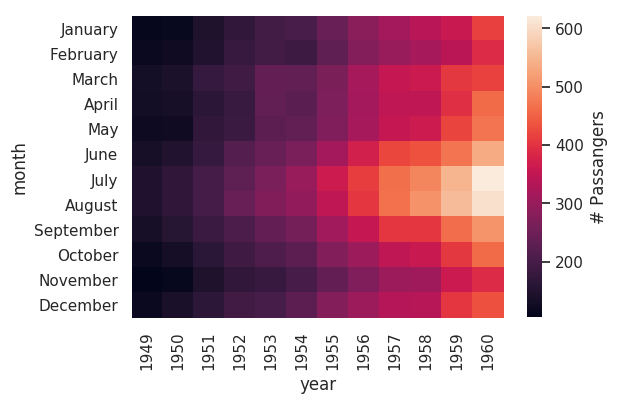

In [66]:
sns.heatmap(flights, cbar_kws=dict(label='# Passangers'));

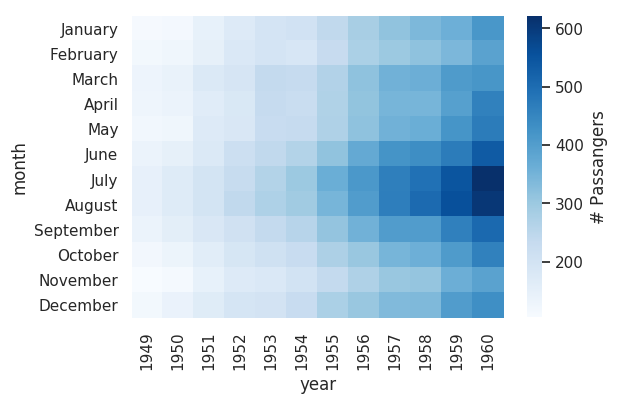

In [67]:
sns.heatmap(
    flights, 
    cbar_kws=dict(label='# Passangers'),
    cmap='Blues',
);

---

In [68]:
crashes = sns.load_dataset('car_crashes')
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


Sometimes you have diverging data, such as the correlation: two variables can be correlated either positively (both increase and decrease at the same time) or negatively (when one increases, the other decreases). So we adapt to a diverging colormap.

In [69]:
import numpy as np

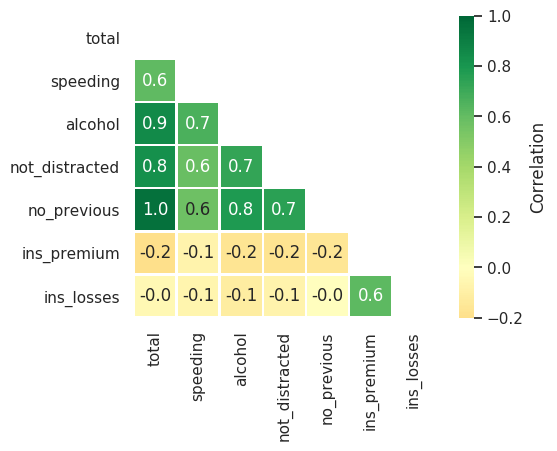

In [70]:
corr = crashes.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr, 
                     mask=mask,
                     cbar_kws=dict(label='Correlation'),
                     cmap='RdYlGn', 
                     center=0, #vmin=-.5,
                     annot=True, 
                     fmt='.1f', 
                     lw=1,
                     square=True)

Play with some more colormaps! [Reference](https://matplotlib.org/examples/color/colormaps_reference.html) (scroll down to "Diverging colormaps"). You can append `_r` to reverse the colormap.

---

TODO: colorbrewer, set2, set3

## Other packages

Matplotlib is the most widely used Python visualization library. Seaborn is also very used. There are many other ones, most with overlapping functionality (line, bar charts etc). Then there that offer specific kinds of visualizations. These are the ones I found useful throughout the years

### Joyplots

In [71]:
from joypy import joyplot

In [72]:
sns.reset_orig()

/Users/stefan/.virtualenvs/viz-workshop/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/stefan/.virtualenvs/viz-workshop/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


Got their name from Joy Division's [album](https://itunes.apple.com/us/album/unknown-pleasures-remastered/544363171) that used such a plot on as their cover. Otherwise known as a ridgeplot. More recently popularized by Tensorflow's display of weights distributions over time.

Shows distributions over an ordinal variable or discretized time.

In [73]:
import pandas as pd

In [74]:
weather = pd.read_csv('example_files/weather.csv')

In [75]:
month_names = 'January February March April May June July August September Octomber November December'.split()

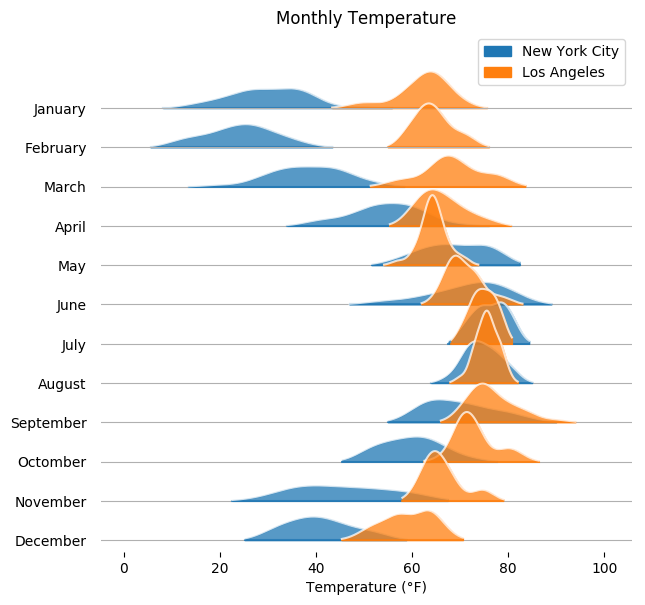

In [76]:
fig, axes = joyplot(
    weather, by='month', column=['New York City', 'Los Angeles'],
    alpha=.75, range_style='own', grid='y', linecolor='white', 
    figsize=(6, 6), title='Monthly Temperature', legend=True,
)

axes[-1].set_xlabel('Temperature (°F)')
for month, ax in zip(month_names, axes):
    ax.set_yticklabels([month])

Exercise: plot the same thing, in Celsius (formula: C = (F - 32) * 5/9)

In [ ]:
### Network plots

---

TODO: 
 - matplotlib
   - twin y axes
 - seaborn plots
   - boxen (larger dataset) https://seaborn.pydata.org/examples/large_distributions.html
   - more fancy multi-plots?
   - https://seaborn.pydata.org/examples/grouped_barplot.html
   - stacked area charts https://python-graph-gallery.com/all-charts/
- pandas dataframe 
  - plot shortcuts (.plot, etc)
  - styling https://pandas.pydata.org/pandas-docs/stable/style.html
 - plotly
   - sankey chart (data https://docs.google.com/spreadsheets/d/1Bcjp2nLaISJ7I1HqhEg8ZcoM2lFIX2YfTVTTRVd7SCA/edit#gid=0) https://plot.ly/python/parallel-categories-diagram/
   - interactive scatterplot (zoom, pan, with more information on hover)
   - choropleth (on a map) https://plot.ly/python/maps/
   - treemap?
   - chord diagram https://plot.ly/python/filled-chord-diagram/
   - maybe: wind rose over https://geoffboeing.com/2018/07/comparing-city-street-orientations/
 
- others
 - networkx (something with node color, node size, edge weight)
 - 3D visualization (https://plot.ly/python/3d-network-graph/) on word embeddings?
 - bump chart/slopegraph (can't find it)
 - search for list of python viz libs by popularity
 - gephi (nice rounded corners but no customizability)
 - no: radar/spider charts

## Further reading
 - Packages Data Visualization Packages: [talk](https://www.youtube.com/watch?v=FytuB8nFHPQ)